In [1]:
#%%import libraries
import numpy as np
np.set_printoptions(threshold=np.inf) 
np.core.arrayprint._line_width=np.inf

import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 100000)

import os
import shutil
import glob

import sklearn  
from sklearn.ensemble.gradient_boosting import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ( Dense, Dropout,Input)
from tensorflow.keras.models import load_model

import pickle

import warnings
warnings.filterwarnings("ignore")

#%%Read Data

D:\Machine_learning\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
x_train=pd.read_csv(r'E:\01-GP\06-DeepLearning_part\00-Trainig_Testing_Data\Results\x_train.csv')
y_train=pd.read_csv(r'E:\01-GP\06-DeepLearning_part\00-Trainig_Testing_Data\Results\y_train.csv')
x_test=pd.read_csv(r'E:\01-GP\06-DeepLearning_part\00-Trainig_Testing_Data\Results\x_test.csv')
y_test=pd.read_csv(r'E:\01-GP\06-DeepLearning_part\00-Trainig_Testing_Data\Results\y_test.csv')


LogisticRegressionModel Train Score is :  0.9865793006448454
LogisticRegressionModel Test Score is :  0.9866680871140061
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [100]
----------------------------------------------------
Predicted Value for LogisticRegressionModel is :  [0 1 1 0 0 0 0 0 0 1]
Prediction Probabilities Value for LogisticRegressionModel is :  [[9.98984767e-01 1.01523339e-03]
 [1.79853988e-01 8.20146012e-01]
 [3.15850250e-01 6.84149750e-01]
 [9.98222994e-01 1.77700573e-03]
 [9.98571604e-01 1.42839634e-03]
 [9.99216889e-01 7.83110511e-04]
 [9.98365901e-01 1.63409896e-03]
 [9.98603674e-01 1.39632606e-03]
 [9.98427387e-01 1.57261289e-03]
 [2.10973852e-01 7.89026148e-01]]
Confusion Matrix is : 
 [[375544   4269]
 [   987  13442]]


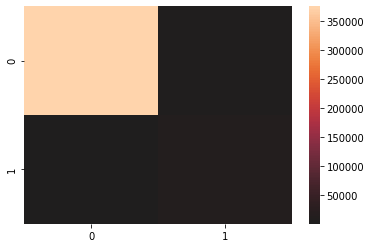

In [7]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#----------------------------------------------------

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',random_state=33)
LogisticRegressionModel.fit(x_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(x_test)
y_pred_prob = LogisticRegressionModel.predict_proba(x_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()


print('====================================================')


SVCModel Train Score is :  0.9642535322552723
SVCModel Test Score is :  0.9637938119226263
----------------------------------------------------
Predicted Value for SVCModel is :  [0 0 0 0 0 0 0 0 0 0]
Confusion Matrix is : 
 [[379754     59]
 [ 14215    214]]


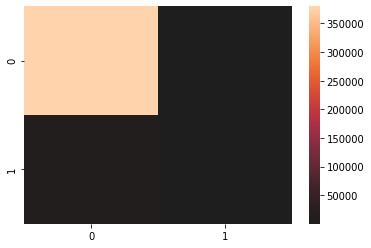

In [9]:

#----------------------------------------------------
#Applying SVC Model 

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(x_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVCModel.predict(x_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
#----------------------------------------------------


In [11]:
input_layer= Input(shape=(x_train.shape[1]))
x=Dense(16,'relu')(input_layer)
x=Dense(1,'sigmoid')(x)

model = Model(inputs=input_layer, outputs=x)
model.compile(optimizer ='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])
hist=model.fit(np.array(x_train), np.array(y_train), epochs=1,
          validation_data=(np.array(x_test), np.array(y_test)))


49281/49281 [==============================] - 162s 3ms/step - loss: 0.0253 - accuracy: 0.9882 - val_loss: 0.0213 - val_accuracy: 0.9892
